## Fake New Classifier

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import precision_recall_fscore_support, f1_score

In [50]:
# Import `fake_or_real_news.csv` 
df = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/fake_or_real_news.csv")
    
# Set index 
df = df.set_index("Unnamed: 0")


In [51]:
# Inspect shape of `df`
df.shape

(6335, 3)

In [52]:
# Print first lines of `df` 
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [53]:
# Set `y` 
y = df.label 

df = df.drop("label", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)


## Creating Vectorizer Classifiers

### Using Count Vectorizer
Convert a collection of text documents to a matrix of token counts 

This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix. 

If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data. 

In [54]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

print(count_test)

  (0, 2385)	1
  (0, 3184)	1
  (0, 4067)	1
  (0, 4919)	1
  (0, 5460)	2
  (0, 7383)	1
  (0, 7422)	1
  (0, 7464)	1
  (0, 10525)	1
  (0, 10673)	2
  (0, 10984)	1
  (0, 10985)	2
  (0, 12457)	1
  (0, 12601)	1
  (0, 13343)	1
  (0, 14163)	1
  (0, 14446)	1
  (0, 14867)	1
  (0, 15085)	1
  (0, 15285)	1
  (0, 15812)	1
  (0, 15870)	1
  (0, 15942)	2
  (0, 16027)	4
  (0, 16580)	1
  :	:
  (2090, 52119)	1
  (2090, 52134)	2
  (2090, 52193)	3
  (2090, 52290)	1
  (2090, 52661)	1
  (2090, 52926)	2
  (2090, 52948)	1
  (2090, 53308)	1
  (2090, 53607)	1
  (2090, 53792)	4
  (2090, 54120)	1
  (2090, 54171)	1
  (2090, 54393)	2
  (2090, 54647)	5
  (2090, 54699)	1
  (2090, 54746)	1
  (2090, 54822)	3
  (2090, 54850)	1
  (2090, 54936)	2
  (2090, 55614)	1
  (2090, 55764)	2
  (2090, 55773)	1
  (2090, 55858)	1
  (2090, 56196)	1
  (2090, 56512)	1


### Using Tf-IDF Vectorizer
#### Convert a collection of raw documents to a matrix of TF-IDF features.  (term frequency–inverse document frequency)

In [56]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [57]:
print(tfidf_test)


  (0, 56196)	0.043317993781946
  (0, 56091)	0.032700334892684514
  (0, 55858)	0.05420932672571138
  (0, 55358)	0.059873902121258926
  (0, 55027)	0.048465128413932454
  (0, 54772)	0.06742854646276102
  (0, 54647)	0.03727533728426692
  (0, 54484)	0.1271579409566499
  (0, 54400)	0.05200707680397371
  (0, 54182)	0.17039563890103226
  (0, 52193)	0.050614987002584974
  (0, 52166)	0.09946716362549408
  (0, 52164)	0.07141989873688631
  (0, 51896)	0.09946458588236584
  (0, 51083)	0.06988430196901438
  (0, 50973)	0.11421142130023298
  (0, 50920)	0.08108261495679815
  (0, 50712)	0.07153047197062776
  (0, 50690)	0.05024667107829908
  (0, 50627)	0.04286648720912277
  (0, 48965)	0.06202757667895662
  (0, 48929)	0.17556869825083593
  (0, 46631)	0.14220349264725846
  (0, 46621)	0.10706347107534141
  (0, 44522)	0.040932482324428275
  :	:
  (2090, 5969)	0.03303772830203347
  (2090, 5576)	0.04943418930560652
  (2090, 5530)	0.05752451982231977
  (2090, 4919)	0.026792001261175008
  (2090, 4321)	0.038896002

In [110]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-50:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[-50:])


['ראש', 'רבה', 'רלוונטיים', 'רק', 'שאוסלו', 'שהוגדר', 'שהיא', 'שהיו', 'שהמבצע', 'שוך', 'שולטים', 'שזו', 'שטחים', 'שינוי', 'שיתעקש', 'שכל', 'שכמוני', 'של', 'שלו', 'שנדרש', 'שני', 'שעת', 'שתי', 'תאמצנה', 'תוצאה', 'תחל', 'תיירות', 'תנותק', 'תעודת', 'תתרכז', 'أن', 'إجلاء', 'الأمر', 'الجرحى', 'الدولية', 'القادمون', 'اللجنة', 'تحتاج', 'تعرفه', 'تنجح', 'حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']
['ראש', 'רבה', 'רלוונטיים', 'רק', 'שאוסלו', 'שהוגדר', 'שהיא', 'שהיו', 'שהמבצע', 'שוך', 'שולטים', 'שזו', 'שטחים', 'שינוי', 'שיתעקש', 'שכל', 'שכמוני', 'של', 'שלו', 'שנדרש', 'שני', 'שעת', 'שתי', 'תאמצנה', 'תוצאה', 'תחל', 'תיירות', 'תנותק', 'תעודת', 'תתרכז', 'أن', 'إجلاء', 'الأمر', 'الجرحى', 'الدولية', 'القادمون', 'اللجنة', 'تحتاج', 'تعرفه', 'تنجح', 'حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


As you can see by running the cells below, both vectorizers extracted the same tokens, but obviously have different weights. Likely, changing the max_df and min_df of the TF-IDF vectorizer could alter the result and lead to different features in each.

In [60]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
difference = set(count_df.columns) - set(tfidf_df.columns)
difference
set()
print(count_df.equals(tfidf_df))
count_df.head()

False


,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Confusion Matrix plotter

In [61]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Use Bayesian models

Naive Bayes classifier for multinomial models 
MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). The distribution is parametrized by vectors for each class , where is the number of features (in text classification, the size of the vocabulary) and is the probability of feature appearing in a sample belonging to class. 

### Confusion Matrix Using TfIdf Vectorizer

accuracy:   0.857
Confusion matrix, without normalization


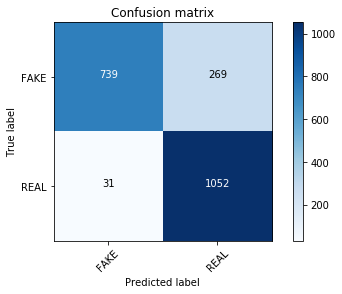

In [98]:
clf_with_tfidf_vec = MultinomialNB() 

clf_with_tfidf_vec.fit(tfidf_train, y_train)

pred = clf_with_tfidf_vec.predict(tfidf_test)

score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


### Confusion Matrix Using Count Vectorizer

accuracy:   0.893
Confusion matrix, without normalization


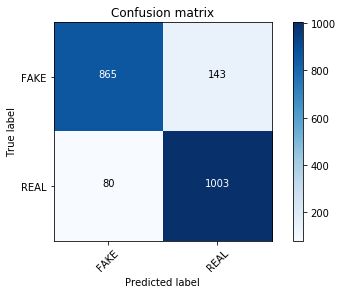

In [99]:
clf_with_count_vec = MultinomialNB() 

clf_with_count_vec.fit(count_train, y_train)

pred = clf_with_count_vec.predict(count_test)

score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Confusion Matrix Using Passive Agressive Classifier
Passive: if correct classification, keep the model; Aggressive: if incorrect classification, update to adjust to this misclassified example.

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.933
Confusion matrix, without normalization


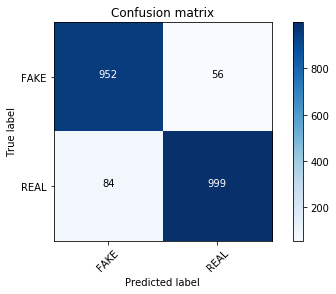

In [100]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### EXAMPLES

In [111]:
# title: "You Can Smell Hillary’s Fear" (FAKE)
article_content = ["Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam.  In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI.  The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI.  But that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election.  The FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI.  The FBI’s leadership is being warned that the entire left-wing establishment will form a lynch mob if they continue going after Hillary. And the FBI’s credibility is being attacked by the media and the Democrats to preemptively head off the results of the investigation of the Clinton Foundation and Hillary Clinton.  The covert struggle between FBI agents and Obama’s DOJ people has gone explosively public.  The New York Times has compared Comey to J. Edgar Hoover. Its bizarre headline, “James Comey Role Recalls Hoover’s FBI, Fairly or Not” practically admits up front that it’s spouting nonsense. The Boston Globe has published a column calling for Comey’s resignation. Not to be outdone, Time has an editorial claiming that the scandal is really an attack on all women.  James Carville appeared on MSNBC to remind everyone that he was still alive and insane. He accused Comey of coordinating with House Republicans and the KGB. And you thought the “vast right wing conspiracy” was a stretch.  Countless media stories charge Comey with violating procedure. Do you know what’s a procedural violation? Emailing classified information stored on your bathroom server.  Senator Harry Reid has sent Comey a letter accusing him of violating the Hatch Act. The Hatch Act is a nice idea that has as much relevance in the age of Obama as the Tenth Amendment. But the cable news spectrum quickly filled with media hacks glancing at the Wikipedia article on the Hatch Act under the table while accusing the FBI director of one of the most awkward conspiracies against Hillary ever.  If James Comey is really out to hurt Hillary, he picked one hell of a strange way to do it.  Not too long ago Democrats were breathing a sigh of relief when he gave Hillary Clinton a pass in a prominent public statement. If he really were out to elect Trump by keeping the email scandal going, why did he trash the investigation? Was he on the payroll of House Republicans and the KGB back then and playing it coy or was it a sudden development where Vladimir Putin and Paul Ryan talked him into taking a look at Anthony Weiner’s computer?  Either Comey is the most cunning FBI director that ever lived or he’s just awkwardly trying to navigate a political mess that has trapped him between a DOJ leadership whose political futures are tied to Hillary’s victory and his own bureau whose apolitical agents just want to be allowed to do their jobs.  The only truly mysterious thing is why Hillary and her associates decided to go to war with a respected Federal agency. Most Americans like the FBI while Hillary Clinton enjoys a 60% unfavorable rating.  And it’s an interesting question.  Hillary’s old strategy was to lie and deny that the FBI even had a criminal investigation underway. Instead her associates insisted that it was a security review. The FBI corrected her and she shrugged it off. But the old breezy denial approach has given way to a savage assault on the FBI.  Pretending that nothing was wrong was a bad strategy, but it was a better one that picking a fight with the FBI while lunatic Clinton associates try to claim that the FBI is really the KGB.  There are two possible explanations.  Hillary Clinton might be arrogant enough to lash out at the FBI now that she believes that victory is near. The same kind of hubris that led her to plan her victory fireworks display could lead her to declare a war on the FBI for irritating her during the final miles of her campaign.  But the other explanation is that her people panicked.  Going to war with the FBI is not the behavior of a smart and focused presidential campaign. It’s an act of desperation. When a presidential candidate decides that her only option is to try and destroy the credibility of the FBI, that’s not hubris, it’s fear of what the FBI might be about to reveal about her.  During the original FBI investigation, Hillary Clinton was confident that she could ride it out. And she had good reason for believing that. But that Hillary Clinton is gone. In her place is a paranoid wreck. Within a short space of time the “positive” Clinton campaign promising to unite the country has been replaced by a desperate and flailing operation that has focused all its energy on fighting the FBI.  There’s only one reason for such bizarre behavior.  The Clinton campaign has decided that an FBI investigation of the latest batch of emails poses a threat to its survival. And so it’s gone all in on fighting the FBI. It’s an unprecedented step born of fear. It’s hard to know whether that fear is justified. But the existence of that fear already tells us a whole lot.  Clinton loyalists rigged the old investigation. They knew the outcome ahead of time as well as they knew the debate questions. Now suddenly they are no longer in control. And they are afraid.  You can smell the fear.  The FBI has wiretaps from the investigation of the Clinton Foundation. It’s finding new emails all the time. And Clintonworld panicked. The spinmeisters of Clintonworld have claimed that the email scandal is just so much smoke without fire. All that’s here is the appearance of impropriety without any of the substance. But this isn’t how you react to smoke. It’s how you respond to a fire.  The misguided assault on the FBI tells us that Hillary Clinton and her allies are afraid of a revelation bigger than the fundamental illegality of her email setup. The email setup was a preemptive cover up. The Clinton campaign has panicked badly out of the belief, right or wrong, that whatever crime the illegal setup was meant to cover up is at risk of being exposed.  The Clintons have weathered countless scandals over the years. Whatever they are protecting this time around is bigger than the usual corruption, bribery, sexual assaults and abuses of power that have followed them around throughout the years. This is bigger and more damaging than any of the allegations that have already come out. And they don’t want FBI investigators anywhere near it.  The campaign against Comey is pure intimidation. It’s also a warning. Any senior FBI people who value their careers are being warned to stay away. The Democrats are closing ranks around their nominee against the FBI. It’s an ugly and unprecedented scene. It may also be their last stand.  Hillary Clinton has awkwardly wound her way through numerous scandals in just this election cycle. But she’s never shown fear or desperation before. Now that has changed. Whatever she is afraid of, it lies buried in her emails with Huma Abedin. And it can bring her down like nothing else has."]


In [102]:
# title: "Tehran, USA" (FAKE)
article_content2 = ["I’m not an immigrant, but my grandparents are. More than 50 years ago, they arrived in New York City from Iran. I grew up mainly in central New Jersey, an American kid playing little league for the Raritan Red Sox and soccer for the Raritan Rovers. In 1985, I travelled with my family to our ancestral land. I was only eight, but old enough to understand that the Iranians had lost their liberty and freedom. I saw the abject despair of a people who, in a desperate attempt to bring about change, had ushered in nationalist tyrants led by Ayatollah Khomeini.   What I witnessed during that year in Iran changed the course of my life. In 1996, at age 19, wanting to help preserve the blessings of liberty and freedom we enjoy in America, I enlisted in the U.S. Navy. Now, with the rise of Donald Trump and his nationalist alt-right movement, I’ve come to feel that the values I sought to protect are in jeopardy.   In Iran, theocratic fundmentalists sowed division and hatred of outsiders — of Westerners, Christians, and other religious minorities. Here in America, the right wing seems to have stolen passages directly from their playbook as it spreads hatred of immigrants, particularly Muslim ones. This form of nationalistic bigotry — Islamophobia — threatens the heart of our nation. When I chose to serve in the military, I did so to protect what I viewed as our sacred foundational values of liberty, equality, and democracy. Now, 20 years later, I’ve joined forces with fellow veterans to again fight for those sacred values, this time right here at home.   “Death to America!”   As a child, I sat in my class at the international school one sunny morning and heard in the distance the faint sounds of gunfire and rising chants of “Death to America!” That day would define the rest of my life.   It was Tehran, the capital of Iran, in 1985. I was attending a unique school for bilingual students who had been born in Western nations. It had become the last refuge in that city with any tolerance for Western teaching, but that also made it a target for military fundamentalists. As the gunfire drew closer, I heard boots pounding the marble tiles outside, marching into our building, and thundering down the corridor toward my classroom. As I heard voices chanting “Death to America!” I remember wondering if I would survive to see my parents again.   In a flash of green and black uniforms, those soldiers rushed into our classroom, grabbed us by our shirt collars, and yelled at us to get outside. We were then packed into the school’s courtyard where a soldier pointed his rifle at our group and commanded us to look up. Almost in unison, my classmates and I raised our eyes and saw the flags of our many nations being torn down and dangled from the balcony, then set ablaze and tossed, still burning, into the courtyard. As those flags floated to the ground in flames, the soldiers fired their guns in the air. Shouting, they ordered us — if we ever wanted to see our families again — to swear allegiance to the Grand Ayatollah Khomeini and trample on the remains of the burning symbols of our home countries. I scanned the smoke that was filling the courtyard for my friends and classmates and, horrified, watched them capitulate and begin to chant, “Death to America!” as they stomped on our sacred symbols.   I was so angry that, young as I was, I began to plead with them to come to their senses. No one paid the slightest attention to an eight year old and yet, for the first time in my life, I felt something like righteous indignation. I suspect that, born and raised in America, I was already imbued with such a sense of privilege that I just couldn’t fathom the immense danger I was in. Certainly, I was acting in ways no native Iranian would have found reasonable.   Across the smoke-filled courtyard, I saw a soldier coming at me and knew he meant to force me to submit. I spotted an American flag still burning, dropped to my knees, and grabbed the charred pieces from underneath a classmate’s feet. As the soldier closed in on me, I ducked and ran, still clutching my charred pieces of flag into a crowd of civilians who had gathered to witness the commotion. The events of that day would come to define all that I have ever stood for — or against.   “Camel Jockey,” “Ayatollah,” and “Gandhi”   My parents and I soon returned to the United States and I entered third grade. More than anything, I just wanted to be normal, to fit in and be accepted by my peers. Unfortunately, my first name, Nader (which I changed to Nate upon joining the Navy), and my swarthy Middle Eastern appearance, were little help on that score, eliciting regular jibes from my classmates. Even at that young age, they had already mastered a veritable thesaurus of ethnic defamation, including “camel jockey,” “sand-nigger,” “raghead,” “ayatollah,” and ironically, “Gandhi” (which I now take as a compliment). My classmates regularly sought to “other-ize” me in those years, as if I were a lesser American because of my faith and ethnicity.   Yet I remember that tingling in my chest when I first donned my Cub Scout uniform — all because of the American flag patch on its shoulder. Something felt so good about wearing it, a feeling I still had when I joined the military. It seems that the flag I tried to rescue in Tehran was stapled to my heart, or that’s how I felt anyway as I wore my country’s uniform.   When I took my oath of enlistment in the U.S. Navy, I gave my mom a camera and asked her to take some photos, but she was so overwhelmed with pride and joy that she cried throughout the ceremony and managed to snap only a few images of the carpet. She cried even harder when I was selected to serve as the first Muslim-American member of the U.S. Navy Presidential Ceremonial Honor Guard . On that day, I was proud, too, and all the taunts of those bullies of my childhood seemed finally silenced.   Being tormented because of my ethnicity and religion in those early years had another effect on me. It caused me to become unusually sensitive to the nature of other people. Somehow, I grasped that, if it weren’t for a fear of the unknown, there was an inherent goodness and frail humanity lurking in many of the kids who bullied and harassed me. Often, I discovered, those same bullies could be tremendously kind to their families, friends, or even strangers. I realized, then, that if, despite everything, I could lay myself bare and trust them enough to reach out in kindness, I might in turn gain their trust and they might then see me, too, and stop operating from such a place of fear and hate.   Through patience, humor, and understanding, I was able to offer myself as the embodiment of my people and somehow defang the “otherness” of so much that Americans found scary. To this day, I have friends from elementary school, middle school, high school, and the military who tell me that I am the only Muslim they have ever known and that, had they not met me, their perspective on Islam would have been wholly subject to the prevailing fear-based narrative that has poisoned this country since September 11, 2001.   In 1998, I became special assistant to the Master Chief Petty Officer of the Navy and then, in 1999, I was recruited to serve at the Defense Intelligence Agency. In August 2000, I transferred to the Naval Reserve.   In the wake of 9/11, I began to observe how so many of my fellow Americans were adopting a fundamentalist “us vs. them” attitude towards Muslims and Islam. I suddenly found myself in an America where the scattered insults I had endured as a child took on an overarching and sinister meaning and form, where they became something like an ideology and way of life.   By the time I completed my military service in 2006, I had begun to understand that our policies in the Middle East,similarly disturbed, seemed in pursuit of little more than perpetual warfare. That, in turn, was made possible by the creation of a new enemy: Islam — or rather of a portrait, painted by the powers-that-be, of Islam as a terror religion, as a hooded villain lurking out there somewhere in the desert, waiting to destroy us. I knew that attempting to dispel, through the patient approach of my childhood, the kind of Islamophobia that now had the country by the throat was not going to be enough. Post-9/11 attacks on Muslims in the U.S. and elsewhere were not merely childish taunts.   For the first time in my life, in a country gripped by fear, I believed I was witnessing a shift, en masse, toward an American fundamentalism and ultra-nationalism that reflected a wanton lack of reason, not to mention fact. As a boy in Iran, I had witnessed the dark destination down which such a path could take a country. Now, it seemed to me, in America’s quest to escape the very demons we had sown by our own misadventures in the Middle East, and forsaking the hallmarks of our founding, we risked becoming everything we sought to defeat.   The Boy in the Schoolyard Grown Up   On February 10, 2015, three young American students, Yusor Abu-Salha, Razan Abu-Salha, and Deah Shaddy Barakat, were executed at an apartment complex in Chapel Hill, North Carolina. The killer was a gun-crazy white man filled with hate and described by his own daughter as “a monster.” Those assassinations struck a special chord of sorrow and loss in me. My mom and I cried and prayed together for those students and their families.   The incident in Chapel Hill also awoke in me some version of the righteous indignation I had felt so many years earlier in that smoke-filled courtyard in Iran. I would be damned if I stood by while kids in my country were murdered simply because of their faith. It violated every word of the oath I had taken when I joined the military and desecrated every value I held in my heart as a sacred tenet of our nation. White nationalists and bigots had, by then, thrown down the gauntlet for so much of this, using Islamophobia to trigger targeted assassinations in the United States. This was terrorism, pure and simple, inspired by hate-speakers here at home.   At that moment, I reached out to fellow veterans who, I thought, might be willing to help — and it’s true what they say about soul mates being irrevocably drawn to each other. When I contacted Veterans For Peace , an organization dedicated to exposing the costs of war and militarism, I found the leadership well aware of the inherent dangers of Islamophobia and of the need to confront this new enemy. So Executive Director Michael McPhearson formed a committee of vets from around the country to decide how those of us who had donned uniforms to defend this land could best battle the phenomenon — and I, of course, joined it.   From that committee emerged Veterans Challenge Islamophobia (VCI). It now has organizers in Arizona, Georgia, New Jersey, and Texas, and that’s just a beginning. Totally nonpartisan, VCI focuses on politicians of any party who engage in hate speech. We’ve met with leaders of American Muslim communities, sat with them through Ramadan, and attended their Iftar dinners to break our fasts together. In the wake of the Orlando shooting , we at VCI also mobilized to fight back against attempts to pit the Muslim community against the LGBTQ+ community.   Our group was born of the belief that, as American military veterans, we had a responsibility to call out bigotry, hatred, and the perpetuation of endless warfare. We want the American Muslim community to know that they have allies, and that those allies are indeed veterans as well. We stand with them and for them and, for those of us who are Muslim, among them.   Nationalism and xenophobia have no place in American life, and I, for my part, don’t think Donald Trump or anyone like him should be able to peddle Islamophobia in an attempt to undermine our national unity. Without Islamophobia, there no longer exists a “clash of civilizations.” Without Islamophobia, whatever the problems in the world may be, there is no longer an “us vs. them” and it’s possible to begin reimagining a world of something other than perpetual war.   As of now, this remains the struggle of my life, for despite my intense love for America, some of my countrymen increasingly see American Muslims as the “other,” the enemy.   My Mom taught me as a boy that the only thing that mattered was what was in my heart. Now, with her in mind and as a representative of VCI, when I meet fellow Americans I always remember my childhood experiences with my bullying peers. And I still lay myself bare, as I did then. I give trust to gain trust, but always knowing that these days this isn’t just a matter of niceties. It’s a question of life or death. It’s part of a battle for the soul of our nation.   In many ways, I still consider myself that boy in the school courtyard in Tehran trying to rescue charred pieces of that flag from those trampling feet. It’s just that now I’m doing it in my own country.   Nate Terani is a veteran of the U.S. Navy and served in military intelligence with the Defense Intelligence Agency. He is currently a member of the leadership team at Common Defense PAC and regional campaign organizer with Veterans Challenge Islamophobia . He is a featured columnist with the Arizona Muslim Voice newspaper. (Reprinted from TomDispatch by permission of author or representative)"]


#### Using TF-IDF Vectorizer and MultinomialNB

In [113]:
tfidf_article_to_predict = tfidf_vectorizer.transform(article_content)

print(clf_with_tfidf_vec.predict(tfidf_article_to_predict))


['FAKE']


In [123]:
tfidf_article_to_predict = tfidf_vectorizer.transform(article_content2)

print(clf_with_tfidf_vec.predict(tfidf_article_to_predict))

['FAKE']


#### Using Count Vectorizer and MultinomialNB

In [115]:
count_vec_article_to_predict = count_vectorizer.transform(article_content)

print(clf_with_count_vec.predict(count_vec_article_to_predict))

['FAKE']


In [116]:
count_vec_article_to_predict = tfidf_vectorizer.transform(article_content2)
print(clf_with_count_vec.predict(count_vec_article_to_predict))

['FAKE']


### Example not in dataset

In [135]:
article_content3 = ["The Veterans Affairs Department’s watchdog is investigating a new office created by President Trump early in his administration that was designed to protect whistleblowers from reprisal but is now facing allegations of aiding retaliation against them. VA’s Office of Inspector General is leading the investigation from its new Office of Special Reviews, which the IG created to conduct “prompt reviews of significant events” and examine allegations of senior VA employee misconduct, an IG spokesman said. The new IG office is looking into activities at the Office of Accountability and Whistleblower Protection as part of an ongoing review of the implementation of the 2017 law that created OAWP."]


In [136]:
count_vec_article_to_predict1 = count_vectorizer.transform(article_content3)

print(clf_with_count_vec.predict(count_vec_article_to_predict1))

['REAL']


In [137]:
tfidf_article_to_predict2 = tfidf_vectorizer.transform(article_content3)

print(clf_with_tfidf_vec.predict(tfidf_article_to_predict2))

['REAL']


### Other Example

In [138]:
article_content4 = ["Comments A disturbing new report suggests that over two-thirds of wild animals living on Earth are set to become extinct by the year 2020. The comprehensive report by the WWF and Zoological Society of London says animal populations across the globe will continue to plummet by 67% by 2020 due to a mass extinction that is killing the natural world."]

In [139]:
count_vec_article_to_predict1 = count_vectorizer.transform(article_content4)

print(clf_with_count_vec.predict(count_vec_article_to_predict1))

['FAKE']


In [140]:
tfidf_article_to_predict2 = tfidf_vectorizer.transform(article_content4)

print(clf_with_tfidf_vec.predict(tfidf_article_to_predict2))

['FAKE']


### Get features names

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names()

### Most real

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names()
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

### Most fake

In [ ]:
sorted(zip(clf.coef_[0], feature_names))[:20]

### Using HashingVectorizer
Convert a collection of text documents to a matrix of token occurrences 

It turns a collection of text documents into a scipy.sparse matrix holding token occurrence counts (or binary occurrence information), possibly normalized as token frequencies if norm=’l1’ or projected on the euclidean unit sphere if norm=’l2’. 

This text vectorizer implementation uses the hashing trick to find the token string name to feature integer index mapping. 

In [ ]:
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

In [ ]:
clf = MultinomialNB(alpha=.01)


In [ ]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
